In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

In [1760]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [3]:
Renewal_df = pd.read_csv("Renewal/RenewalData.csv",parse_dates=['Previous Funded Date', 'Current Contract Funded Date',
                                                            'Previous Contract Last Payment Date','Previous Contract Last Activity','Submitted Record Submission Date',
                                                           'Current Contract Last Payment Date','Funded Vintage'])
Renewal_df

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Paid_at_Submission,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match
0,MC200504071,2020-05-05,MCR000154065,MC200108200,MCR000154065,2020-05-04 07:00:00,Funded MCR Number,2020-01-10,2020-06-30 18:43:00,PDOFF,...,0.47,DIR,2020-05-01,0.0,Renewal,MC200504071,Renewal,MC200108200,Match,Match
1,MC200504084,2020-05-05,MCR000067962,MC191206220,MCR000067962,2020-05-04 07:00:00,Funded MCR Number,2019-12-19,NaT,PDOFF,...,0.40,DIR,2020-05-01,0.0,Renewal,MC200504084,Renewal,MC191206220,Match,Match
2,MC200504089,2020-05-05,MCR000110253,MC191211289,MCR000110253,2020-05-04 07:00:00,Funded MCR Number,2019-12-18,2020-11-02 18:37:00,PDOFF,...,0.50,DIR,2020-05-01,0.0,Renewal,MC200504089,Renewal,MC191211289,Match,Match
3,MC200504104,2020-05-05,MCR000067963,MC191125280,MCR000067963,2020-05-04 07:00:00,Funded MCR Number,2019-11-26,2021-01-05 17:12:00,PDOFF,...,0.53,DIR,2020-05-01,0.0,Renewal,MC200504104,Renewal,MC191125280,Match,Match
4,MC200505133,2020-05-20,MCR000077137,MC191015230,MCR000077137,2020-05-05 07:00:00,Funded MCR Number,2019-10-16,2021-02-23 18:04:00,PDOFF,...,0.44,DIR,2020-05-01,0.0,Renewal,MC200505133,Renewal,MC191015230,Match,Match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,MC211026005,2021-10-26,MCR000294865,MC200707186,MCR000294865,2021-10-21 17:14:00,Funded MCR Number,2020-07-08,NaT,ACT,...,1.00,WHO,2021-10-01,6.0,Renewal,MC211026005,Renewal,MC200707186,Match,Match
2440,MC211026009,2021-10-26,MCR000295423,MC210303071,MCR000295423,2021-10-25 18:12:00,Funded MCR Number,2021-03-05,NaT,ACT,...,1.00,DIR,2021-10-01,1.0,Renewal,MC211026009,Renewal,MC210303071,Match,Match
2441,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000271150,2021-06-15 14:57:00,Lost status,2021-06-15,NaT,ACT,...,0.00,DIR,2021-10-01,-4.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match
2442,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000293822,2021-10-15 19:54:00,Funded MCR Number,2021-06-15,NaT,ACT,...,0.67,DIR,2021-10-01,0.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match


In [4]:
Renewal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444 entries, 0 to 2443
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Current Contract Number                 2444 non-null   object        
 1   Current Contract Funded Date            2444 non-null   datetime64[ns]
 2   Current Contract MCR#                   2444 non-null   object        
 3   Previous Contract Number                2444 non-null   object        
 4   Submitted MCR#                          2444 non-null   object        
 5   Submitted Record Submission Date        2444 non-null   datetime64[ns]
 6   Submission_Status                       2444 non-null   object        
 7   Previous Funded Date                    2444 non-null   datetime64[ns]
 8   Current Contract Last Payment Date      1649 non-null   datetime64[ns]
 9   Current_Contract_Account_Status         2444 non-nul

In [5]:
Renewal_df.isnull().sum()

Current Contract Number                      0
Current Contract Funded Date                 0
Current Contract MCR#                        0
Previous Contract Number                     0
Submitted MCR#                               0
Submitted Record Submission Date             0
Submission_Status                            0
Previous Funded Date                         0
Current Contract Last Payment Date         795
Current_Contract_Account_Status              0
Previous Contract Last Payment Date       1664
Previous_Contract_Account_Status             0
Previous Contract Last Activity              3
Previous Contract Lasy Cleared Payment       9
Account_Status_at_Submission                 0
Paid_at_Submission                           0
Iso_Group                                    0
Funded Vintage                               0
Month_Funded_to_Last_Activity                3
Submission_App_Type                          0
FP App Contract Number                       0
FP_App_Type  

In [6]:
Renewal_df.groupby('Previous Contract Number').size()

Previous Contract Number
MC150811041    1
MC160816002    1
MC160907052    1
MC160919082    2
MC161122058    1
              ..
MC210813011    1
MC210827010    1
MC210831018    1
MC210910017    1
MC210921013    1
Length: 2123, dtype: int64

In [7]:
Paidrate = (sum(Renewal_df["Paid_at_Submission"])/len(Renewal_df['Paid_at_Submission'].index))*100
Paidrate 

66.09247135842894

In [1766]:
#Renewal_df.groupby('Submitted MCR#').sum()

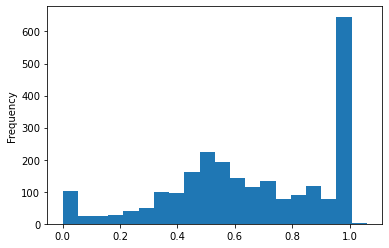

In [8]:
ax = Renewal_df['Paid_at_Submission'].plot.hist(bins=20)

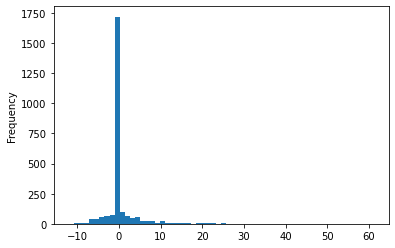

In [9]:
ax = Renewal_df['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [10]:
Renewal_df['Difference'] = (Renewal_df['Submitted Record Submission Date']- Renewal_df['Previous Contract Last Activity']).dt.days

In [11]:
Renewal_df

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
0,MC200504071,2020-05-05,MCR000154065,MC200108200,MCR000154065,2020-05-04 07:00:00,Funded MCR Number,2020-01-10,2020-06-30 18:43:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504071,Renewal,MC200108200,Match,Match,-1.0
1,MC200504084,2020-05-05,MCR000067962,MC191206220,MCR000067962,2020-05-04 07:00:00,Funded MCR Number,2019-12-19,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504084,Renewal,MC191206220,Match,Match,-1.0
2,MC200504089,2020-05-05,MCR000110253,MC191211289,MCR000110253,2020-05-04 07:00:00,Funded MCR Number,2019-12-18,2020-11-02 18:37:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504089,Renewal,MC191211289,Match,Match,-1.0
3,MC200504104,2020-05-05,MCR000067963,MC191125280,MCR000067963,2020-05-04 07:00:00,Funded MCR Number,2019-11-26,2021-01-05 17:12:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504104,Renewal,MC191125280,Match,Match,-1.0
4,MC200505133,2020-05-20,MCR000077137,MC191015230,MCR000077137,2020-05-05 07:00:00,Funded MCR Number,2019-10-16,2021-02-23 18:04:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200505133,Renewal,MC191015230,Match,Match,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,MC211026005,2021-10-26,MCR000294865,MC200707186,MCR000294865,2021-10-21 17:14:00,Funded MCR Number,2020-07-08,NaT,ACT,...,WHO,2021-10-01,6.0,Renewal,MC211026005,Renewal,MC200707186,Match,Match,194.0
2440,MC211026009,2021-10-26,MCR000295423,MC210303071,MCR000295423,2021-10-25 18:12:00,Funded MCR Number,2021-03-05,NaT,ACT,...,DIR,2021-10-01,1.0,Renewal,MC211026009,Renewal,MC210303071,Match,Match,53.0
2441,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000271150,2021-06-15 14:57:00,Lost status,2021-06-15,NaT,ACT,...,DIR,2021-10-01,-4.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match,-133.0
2442,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000293822,2021-10-15 19:54:00,Funded MCR Number,2021-06-15,NaT,ACT,...,DIR,2021-10-01,0.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match,-10.0


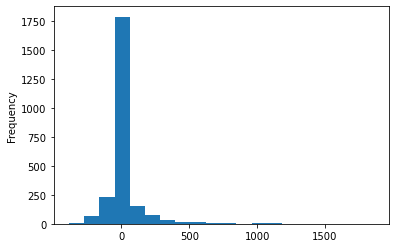

In [12]:
ax = Renewal_df['Difference'].plot.hist(bins=20)

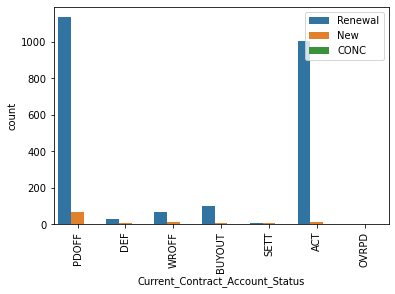

In [14]:
sns.countplot(x = "Current_Contract_Account_Status", hue = "Submission_App_Type", data = Renewal_df)
xticks(rotation = 90)
plt.legend(loc='upper right')

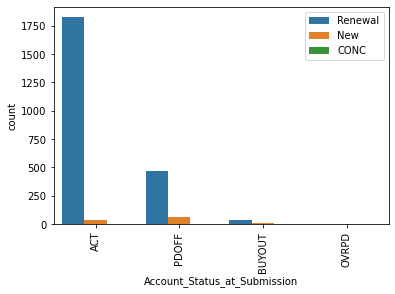

In [16]:
sns.countplot(x = "Account_Status_at_Submission", hue = "Submission_App_Type", data = Renewal_df)
xticks(rotation = 90)
plt.legend(loc='upper right')

In [17]:
Ren_Count_Data = Renewal_df.groupby('Paid_at_Submission').size().reset_index(name='Count')
Ren_Count_Data

,Paid_at_Submission,Count
0,0.00,85
1,0.01,2
2,0.02,3
3,0.03,2
4,0.04,5
...,...,...
99,0.99,12
100,1.00,591
101,1.01,2
102,1.04,1


In [18]:
Ren_mask = (Renewal_df.Iso_Group == "WHO") 
RN_filtered1= Renewal_df[Ren_mask]
RN_filtered1

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
8,MC200506139,2020-05-11,MCR000056317,MC191122186,MCR000056317,2020-05-06 00:00:00,Funded MCR Number,2019-11-26,NaT,PDOFF,...,WHO,2020-05-01,0.0,Renewal,MC200506139,Renewal,MC191122186,Match,Match,-3.0
9,MC200506149,2020-05-07,MCR000056315,MC191021237,MCR000056315,2020-05-06 00:00:00,Funded MCR Number,2019-10-22,NaT,PDOFF,...,WHO,2020-05-01,0.0,Renewal,MC200506149,Renewal,MC191021237,Match,Match,-1.0
15,MC200512031,2020-05-14,MCR000056908,MC200218230,MCR000056908,2020-05-12 00:00:00,Funded MCR Number,2020-02-20,2021-10-26 09:10:00,DEF,...,WHO,2020-05-01,0.0,Renewal,MC200512031,Renewal,MC200218230,Match,Match,-2.0
28,MC200522029,2020-06-01,MCR000056326,MC190904088,MCR000056326,2020-05-22 00:00:00,Funded MCR Number,2019-09-06,2021-04-02 19:23:00,PDOFF,...,WHO,2020-06-01,0.0,Renewal,MC200522029,Renewal,MC190904088,Match,Match,-8.0
29,MC200522047,2020-05-27,MCR000056325,MC191021130,MCR000056325,2020-05-22 00:00:00,Funded MCR Number,2019-11-18,2021-05-26 18:36:00,PDOFF,...,WHO,2020-05-01,0.0,Renewal,MC200522047,Renewal,MC191021130,Match,Match,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,MC211025020,2021-10-25,MCR000295139,MC201113114,MCR000295139,2021-10-22 18:38:00,Funded MCR Number,2020-11-16,2021-10-26 18:25:00,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211025020,Renewal,MC201113114,Match,Match,-1.0
2436,MC211026001,2021-10-26,MCR000294241,MC201210036,MCR000270625,2021-06-11 18:15:00,Lost status,2020-12-28,NaT,ACT,...,WHO,2021-10-01,-4.0,Renewal,MC211026001,Renewal,MC201210036,Match,Match,-137.0
2437,MC211026001,2021-10-26,MCR000294241,MC201210036,MCR000294241,2021-10-19 14:57:00,Funded MCR Number,2020-12-28,NaT,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211026001,Renewal,MC201210036,Match,Match,-7.0
2438,MC211026003,2021-10-26,MCR000290303,MC210412074,MCR000290303,2021-09-27 19:00:00,Funded MCR Number,2021-04-29,NaT,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211026003,Renewal,MC210412074,Match,Match,-28.0


In [19]:
Ren_mask = (RN_filtered1.Paid_at_Submission < 1) & (RN_filtered1.Submission_App_Type == "Renewal")& (RN_filtered1.Submission_Status== "Funded MCR Number") 

RN_filtered2= RN_filtered1[Ren_mask]
RN_filtered2

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
8,MC200506139,2020-05-11,MCR000056317,MC191122186,MCR000056317,2020-05-06 00:00:00,Funded MCR Number,2019-11-26,NaT,PDOFF,...,WHO,2020-05-01,0.0,Renewal,MC200506139,Renewal,MC191122186,Match,Match,-3.0
9,MC200506149,2020-05-07,MCR000056315,MC191021237,MCR000056315,2020-05-06 00:00:00,Funded MCR Number,2019-10-22,NaT,PDOFF,...,WHO,2020-05-01,0.0,Renewal,MC200506149,Renewal,MC191021237,Match,Match,-1.0
15,MC200512031,2020-05-14,MCR000056908,MC200218230,MCR000056908,2020-05-12 00:00:00,Funded MCR Number,2020-02-20,2021-10-26 09:10:00,DEF,...,WHO,2020-05-01,0.0,Renewal,MC200512031,Renewal,MC200218230,Match,Match,-2.0
28,MC200522029,2020-06-01,MCR000056326,MC190904088,MCR000056326,2020-05-22 00:00:00,Funded MCR Number,2019-09-06,2021-04-02 19:23:00,PDOFF,...,WHO,2020-06-01,0.0,Renewal,MC200522029,Renewal,MC190904088,Match,Match,-8.0
29,MC200522047,2020-05-27,MCR000056325,MC191021130,MCR000056325,2020-05-22 00:00:00,Funded MCR Number,2019-11-18,2021-05-26 18:36:00,PDOFF,...,WHO,2020-05-01,0.0,Renewal,MC200522047,Renewal,MC191021130,Match,Match,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,MC211021006,2021-10-21,MCR000291583,MC210707016,MCR000291583,2021-10-05 12:56:00,Funded MCR Number,2021-07-07,2021-10-26 18:25:00,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211021006,Renewal,MC210707016,Match,Match,-16.0
2423,MC211022013,2021-10-22,MCR000291391,MC210402015,MCR000291391,2021-10-04 16:34:00,Funded MCR Number,2021-04-26,2021-10-26 18:25:00,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211022013,Renewal,MC210402015,Match,Match,-18.0
2435,MC211025020,2021-10-25,MCR000295139,MC201113114,MCR000295139,2021-10-22 18:38:00,Funded MCR Number,2020-11-16,2021-10-26 18:25:00,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211025020,Renewal,MC201113114,Match,Match,-1.0
2437,MC211026001,2021-10-26,MCR000294241,MC201210036,MCR000294241,2021-10-19 14:57:00,Funded MCR Number,2020-12-28,NaT,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211026001,Renewal,MC201210036,Match,Match,-7.0


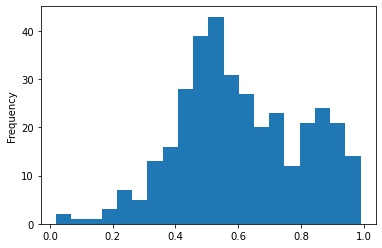

In [20]:
ax = RN_filtered2['Paid_at_Submission'].plot.hist(bins=20)

In [21]:
Ren_mask = (Renewal_df.Iso_Group == "DIR") 
RN_filtered3= Renewal_df[Ren_mask]
RN_filtered3

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
0,MC200504071,2020-05-05,MCR000154065,MC200108200,MCR000154065,2020-05-04 07:00:00,Funded MCR Number,2020-01-10,2020-06-30 18:43:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504071,Renewal,MC200108200,Match,Match,-1.0
1,MC200504084,2020-05-05,MCR000067962,MC191206220,MCR000067962,2020-05-04 07:00:00,Funded MCR Number,2019-12-19,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504084,Renewal,MC191206220,Match,Match,-1.0
2,MC200504089,2020-05-05,MCR000110253,MC191211289,MCR000110253,2020-05-04 07:00:00,Funded MCR Number,2019-12-18,2020-11-02 18:37:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504089,Renewal,MC191211289,Match,Match,-1.0
3,MC200504104,2020-05-05,MCR000067963,MC191125280,MCR000067963,2020-05-04 07:00:00,Funded MCR Number,2019-11-26,2021-01-05 17:12:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504104,Renewal,MC191125280,Match,Match,-1.0
4,MC200505133,2020-05-20,MCR000077137,MC191015230,MCR000077137,2020-05-05 07:00:00,Funded MCR Number,2019-10-16,2021-02-23 18:04:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200505133,Renewal,MC191015230,Match,Match,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,MC211025018,2021-10-25,MCR000290763,MC210520012,MCR000266968,2021-05-20 15:29:00,Lost status,2021-05-20,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,-5.0,Renewal,MC211025018,Renewal,MC210520012,Match,Match,-156.0
2440,MC211026009,2021-10-26,MCR000295423,MC210303071,MCR000295423,2021-10-25 18:12:00,Funded MCR Number,2021-03-05,NaT,ACT,...,DIR,2021-10-01,1.0,Renewal,MC211026009,Renewal,MC210303071,Match,Match,53.0
2441,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000271150,2021-06-15 14:57:00,Lost status,2021-06-15,NaT,ACT,...,DIR,2021-10-01,-4.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match,-133.0
2442,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000293822,2021-10-15 19:54:00,Funded MCR Number,2021-06-15,NaT,ACT,...,DIR,2021-10-01,0.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match,-10.0


In [22]:
Ren_mask = (RN_filtered3.Paid_at_Submission < 1) & (RN_filtered3.Submission_App_Type == "Renewal")& (RN_filtered3.Submission_Status== "Funded MCR Number") 

RN_filtered4= RN_filtered3[Ren_mask]
RN_filtered4

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
0,MC200504071,2020-05-05,MCR000154065,MC200108200,MCR000154065,2020-05-04 07:00:00,Funded MCR Number,2020-01-10,2020-06-30 18:43:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504071,Renewal,MC200108200,Match,Match,-1.0
1,MC200504084,2020-05-05,MCR000067962,MC191206220,MCR000067962,2020-05-04 07:00:00,Funded MCR Number,2019-12-19,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504084,Renewal,MC191206220,Match,Match,-1.0
2,MC200504089,2020-05-05,MCR000110253,MC191211289,MCR000110253,2020-05-04 07:00:00,Funded MCR Number,2019-12-18,2020-11-02 18:37:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504089,Renewal,MC191211289,Match,Match,-1.0
3,MC200504104,2020-05-05,MCR000067963,MC191125280,MCR000067963,2020-05-04 07:00:00,Funded MCR Number,2019-11-26,2021-01-05 17:12:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504104,Renewal,MC191125280,Match,Match,-1.0
4,MC200505133,2020-05-20,MCR000077137,MC191015230,MCR000077137,2020-05-05 07:00:00,Funded MCR Number,2019-10-16,2021-02-23 18:04:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200505133,Renewal,MC191015230,Match,Match,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,MC211025002,2021-10-25,MCR000294318,MC210211104,MCR000294318,2021-10-19 17:00:00,Funded MCR Number,2021-02-11,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,0.0,Renewal,MC211025002,Renewal,MC210211104,Match,Match,-4.0
2431,MC211025011,2021-10-25,MCR000295128,MC210507070,MCR000295128,2021-10-22 18:12:00,Funded MCR Number,2021-05-10,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,0.0,Renewal,MC211025011,Renewal,MC210507070,Match,Match,-1.0
2432,MC211025014,2021-10-25,MCR000291533,MC210521008,MCR000291533,2021-10-04 20:48:00,Funded MCR Number,2021-05-21,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,0.0,Renewal,MC211025014,Renewal,MC210521008,Match,Match,-18.0
2433,MC211025018,2021-10-25,MCR000290763,MC210520012,MCR000290763,2021-09-29 17:16:00,Funded MCR Number,2021-05-20,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,0.0,Renewal,MC211025018,Renewal,MC210520012,Match,Match,-24.0


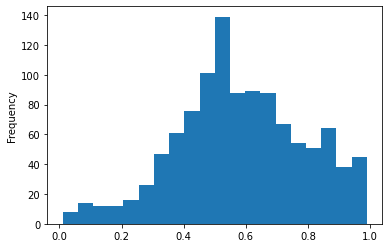

In [23]:
ax = RN_filtered4['Paid_at_Submission'].plot.hist(bins=20)

In [29]:
Ren_mask = (Renewal_df.Paid_at_Submission < 1) & (Renewal_df.Submission_App_Type == "Renewal") & (Renewal_df.Submission_Status== "Funded MCR Number")

RN_filtered5= Renewal_df[Ren_mask]
RN_filtered5

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
0,MC200504071,2020-05-05,MCR000154065,MC200108200,MCR000154065,2020-05-04 07:00:00,Funded MCR Number,2020-01-10,2020-06-30 18:43:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504071,Renewal,MC200108200,Match,Match,-1.0
1,MC200504084,2020-05-05,MCR000067962,MC191206220,MCR000067962,2020-05-04 07:00:00,Funded MCR Number,2019-12-19,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504084,Renewal,MC191206220,Match,Match,-1.0
2,MC200504089,2020-05-05,MCR000110253,MC191211289,MCR000110253,2020-05-04 07:00:00,Funded MCR Number,2019-12-18,2020-11-02 18:37:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504089,Renewal,MC191211289,Match,Match,-1.0
3,MC200504104,2020-05-05,MCR000067963,MC191125280,MCR000067963,2020-05-04 07:00:00,Funded MCR Number,2019-11-26,2021-01-05 17:12:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504104,Renewal,MC191125280,Match,Match,-1.0
4,MC200505133,2020-05-20,MCR000077137,MC191015230,MCR000077137,2020-05-05 07:00:00,Funded MCR Number,2019-10-16,2021-02-23 18:04:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200505133,Renewal,MC191015230,Match,Match,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,MC211025018,2021-10-25,MCR000290763,MC210520012,MCR000290763,2021-09-29 17:16:00,Funded MCR Number,2021-05-20,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,0.0,Renewal,MC211025018,Renewal,MC210520012,Match,Match,-24.0
2435,MC211025020,2021-10-25,MCR000295139,MC201113114,MCR000295139,2021-10-22 18:38:00,Funded MCR Number,2020-11-16,2021-10-26 18:25:00,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211025020,Renewal,MC201113114,Match,Match,-1.0
2437,MC211026001,2021-10-26,MCR000294241,MC201210036,MCR000294241,2021-10-19 14:57:00,Funded MCR Number,2020-12-28,NaT,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211026001,Renewal,MC201210036,Match,Match,-7.0
2438,MC211026003,2021-10-26,MCR000290303,MC210412074,MCR000290303,2021-09-27 19:00:00,Funded MCR Number,2021-04-29,NaT,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211026003,Renewal,MC210412074,Match,Match,-28.0


In [115]:
Ren_Count_Data1 = RN_filtered5.groupby('Paid_at_Submission').size().reset_index(name='Count')
Ren_Count_Data1

,Paid_at_Submission,Count
0,0.01,1
1,0.02,2
2,0.04,3
3,0.05,4
4,0.06,2
...,...,...
93,0.95,15
94,0.96,16
95,0.97,14
96,0.98,11


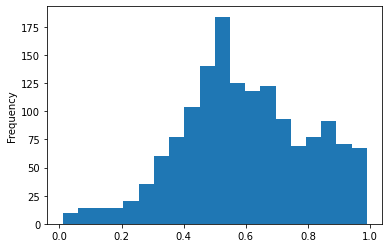

In [31]:
ax = RN_filtered5['Paid_at_Submission'].plot.hist(bins=20)

In [1636]:
#%matplotlib inline
#plt.figure(figsize=(8,6))
#sns.scatterplot("Paid_at_Submission","Month_Funded_to_Last_Activity", hue="Submission_Status", data=RN_filtered4, s=50)
#plt.show()

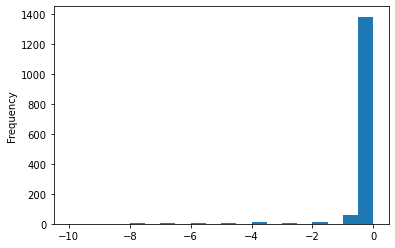

In [32]:
ax = RN_filtered5['Month_Funded_to_Last_Activity'].plot.hist(bins=20)

In [33]:
Ren_Count_Data4 = RN_filtered5.groupby('Month_Funded_to_Last_Activity').size().reset_index(name='Count')
Ren_Count_Data4

,Month_Funded_to_Last_Activity,Count
0,-10.0,1
1,-9.0,1
2,-8.0,3
3,-7.0,6
4,-6.0,8
5,-5.0,5
6,-4.0,12
7,-3.0,8
8,-2.0,14
9,-1.0,59


In [1639]:
#%matplotlib inline
#plt.pie(Ren_Count_Data1.Count, labels = Ren_Count_Data1.Paid_at_Submission, 
       # shadow=True, autopct='%1.1f%%', radius=1.5);

In [34]:
Ren_mask = (RN_filtered1.Paid_at_Submission >= 1) & (RN_filtered1.Submission_App_Type == "Renewal") 

RN_filtered6= RN_filtered1[Ren_mask]
RN_filtered6

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
60,MC200605004,2020-06-10,MCR000056344,MC200311264,MCR000056344,2020-06-05 00:00:00,Funded MCR Number,2020-04-07,2020-09-08 18:54:00,WROFF,...,WHO,2020-06-01,0.0,Renewal,MC200605004,Renewal,MC200311264,Match,Match,-1.0
80,MC200616089,2020-06-19,MCR000056359,MC190501116,MCR000056359,2020-06-16 00:00:00,Funded MCR Number,2019-05-23,2021-03-23 19:27:00,PDOFF,...,WHO,2020-06-01,2.0,Renewal,MC200616089,Renewal,MC190501116,Match,Match,81.0
93,MC200622089,2020-06-25,MCR000056366,MC190326194,MCR000056366,2020-06-22 00:00:00,Funded MCR Number,2019-03-28,NaT,PDOFF,...,WHO,2020-06-01,4.0,Renewal,MC200622089,Renewal,MC190326194,Match,Match,144.0
102,MC200625001,2020-06-30,MCR000056045,MC190423227,MCR000056045,2020-06-25 00:00:00,Funded MCR Number,2019-06-13,2021-08-03 09:21:00,PDOFF,...,WHO,2020-06-01,0.0,Renewal,MC200625001,Renewal,MC190423227,Match,Match,1.0
103,MC200625006,2020-06-29,MCR000056043,MC190617208,MCR000056043,2020-06-25 00:00:00,Funded MCR Number,2019-06-21,2021-09-29 09:49:00,PDOFF,...,WHO,2020-06-01,3.0,Renewal,MC200625006,Renewal,MC190617208,Match,Match,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,MC211014001,2021-10-14,MCR000293007,MC210730008,MCR000293007,2021-10-12 19:58:00,Funded MCR Number,2021-07-30,2021-10-22 18:40:00,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211014001,Renewal,MC210730008,Match,Match,26.0
2384,MC211014005,2021-10-14,MCR000292474,MC160907052,MCR000292474,2021-10-08 16:53:00,Funded MCR Number,2016-10-03,2021-10-26 18:25:00,ACT,...,WHO,2021-10-01,52.0,Renewal,MC211014005,Renewal,MC160907052,Mismatch,Match,1583.0
2391,MC211015004,2021-10-15,MCR000292395,MC200420132,MCR000292395,2021-10-08 13:34:00,Funded MCR Number,2020-04-21,2021-10-26 18:25:00,ACT,...,WHO,2021-10-01,2.0,Renewal,MC211015004,Renewal,MC200420132,Match,Match,77.0
2416,MC211020011,2021-10-20,MCR000294364,MC210414073,MCR000294364,2021-10-19 18:49:00,Funded MCR Number,2021-04-15,2021-10-26 18:25:00,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211020011,Renewal,MC210414073,Match,Match,-1.0


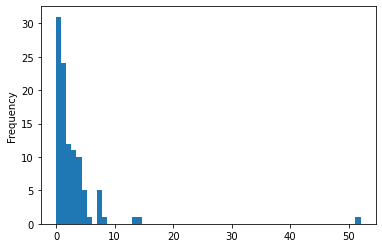

In [35]:
ax = RN_filtered6['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [36]:
Ren_mask = (RN_filtered3.Paid_at_Submission >= 1) & (RN_filtered3.Submission_App_Type == "Renewal") 

RN_filtered7= RN_filtered3[Ren_mask]
RN_filtered7

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
14,MC200511049,2020-05-12,MCR000144419,MC190807278,MCR000144419,2020-05-11 07:00:00,Funded MCR Number,2019-08-08,2020-11-09 18:40:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200511049,Renewal,MC190807278,Match,Match,25.0
27,MC200522006,2020-05-26,MCR000136592,MC191009353,MCR000136592,2020-05-21 07:00:00,Funded MCR Number,2019-10-28,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200522006,Renewal,MC191009353,Match,Match,20.0
35,MC200526063,2020-05-27,MCR000141768,MC191126307,MCR000141768,2020-05-26 07:00:00,Funded MCR Number,2019-11-27,NaT,PDOFF,...,DIR,2020-05-01,2.0,Renewal,MC200526063,Renewal,MC191126307,Match,Match,80.0
40,MC200528068,2020-06-23,MCR000154548,MC190812299,MCR000154548,2020-05-21 07:00:00,Funded MCR Number,2019-08-30,2020-09-22 18:40:00,PDOFF,...,DIR,2020-06-01,5.0,Renewal,MC200528068,Renewal,MC190812299,Mismatch,Match,169.0
42,MC200529076,2020-06-08,MCR000152710,MC190606216,MCR000152710,2020-05-29 07:00:00,Funded MCR Number,2019-06-07,NaT,PDOFF,...,DIR,2020-06-01,3.0,Renewal,MC200529076,Renewal,MC190606216,Match,Match,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,MC211022008,2021-10-22,MCR000294291,MC170828007,MCR000294291,2021-10-19 16:09:00,Funded MCR Number,2017-09-08,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,40.0,Renewal,MC211022008,Renewal,MC170828007,Mismatch,Match,1223.0
2425,MC211022016,2021-10-22,MCR000292157,MC210112212,MCR000292157,2021-10-07 14:00:00,Funded MCR Number,2021-01-13,2021-10-25 18:34:00,ACT,...,DIR,2021-10-01,4.0,Renewal,MC211022016,Renewal,MC210112212,Match,Match,124.0
2430,MC211025009,2021-10-25,MCR000293249,MC201020116,MCR000293249,2021-10-13 18:07:00,Funded MCR Number,2020-10-20,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,4.0,Renewal,MC211025009,Renewal,MC201020116,Match,Match,144.0
2440,MC211026009,2021-10-26,MCR000295423,MC210303071,MCR000295423,2021-10-25 18:12:00,Funded MCR Number,2021-03-05,NaT,ACT,...,DIR,2021-10-01,1.0,Renewal,MC211026009,Renewal,MC210303071,Match,Match,53.0


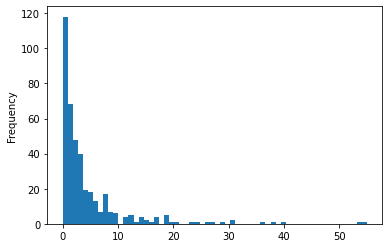

In [37]:
ax = RN_filtered7['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [38]:
Ren_mask = (Renewal_df.Paid_at_Submission >= 1) & (Renewal_df.Submission_App_Type == "Renewal") 

RN_filtered8= Renewal_df[Ren_mask]
RN_filtered8

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
14,MC200511049,2020-05-12,MCR000144419,MC190807278,MCR000144419,2020-05-11 07:00:00,Funded MCR Number,2019-08-08,2020-11-09 18:40:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200511049,Renewal,MC190807278,Match,Match,25.0
27,MC200522006,2020-05-26,MCR000136592,MC191009353,MCR000136592,2020-05-21 07:00:00,Funded MCR Number,2019-10-28,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200522006,Renewal,MC191009353,Match,Match,20.0
35,MC200526063,2020-05-27,MCR000141768,MC191126307,MCR000141768,2020-05-26 07:00:00,Funded MCR Number,2019-11-27,NaT,PDOFF,...,DIR,2020-05-01,2.0,Renewal,MC200526063,Renewal,MC191126307,Match,Match,80.0
39,MC200528067,2020-05-29,MCR000056742,MC191217003,MCR000056742,2020-05-28 00:00:00,Funded MCR Number,2019-12-18,2021-03-11 09:15:00,PDOFF,...,AP,2020-05-01,0.0,Renewal,MC200528067,Renewal,MC191217003,Match,Match,-2.0
40,MC200528068,2020-06-23,MCR000154548,MC190812299,MCR000154548,2020-05-21 07:00:00,Funded MCR Number,2019-08-30,2020-09-22 18:40:00,PDOFF,...,DIR,2020-06-01,5.0,Renewal,MC200528068,Renewal,MC190812299,Mismatch,Match,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,MC211022016,2021-10-22,MCR000292157,MC210112212,MCR000292157,2021-10-07 14:00:00,Funded MCR Number,2021-01-13,2021-10-25 18:34:00,ACT,...,DIR,2021-10-01,4.0,Renewal,MC211022016,Renewal,MC210112212,Match,Match,124.0
2430,MC211025009,2021-10-25,MCR000293249,MC201020116,MCR000293249,2021-10-13 18:07:00,Funded MCR Number,2020-10-20,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,4.0,Renewal,MC211025009,Renewal,MC201020116,Match,Match,144.0
2439,MC211026005,2021-10-26,MCR000294865,MC200707186,MCR000294865,2021-10-21 17:14:00,Funded MCR Number,2020-07-08,NaT,ACT,...,WHO,2021-10-01,6.0,Renewal,MC211026005,Renewal,MC200707186,Match,Match,194.0
2440,MC211026009,2021-10-26,MCR000295423,MC210303071,MCR000295423,2021-10-25 18:12:00,Funded MCR Number,2021-03-05,NaT,ACT,...,DIR,2021-10-01,1.0,Renewal,MC211026009,Renewal,MC210303071,Match,Match,53.0


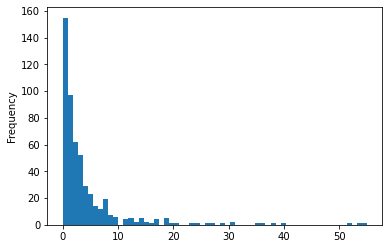

In [39]:
ax = RN_filtered8['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [40]:
Ren_Count_Data5 = RN_filtered8.groupby('Previous_Contract_Account_Status').size().reset_index(name='Count')
Ren_Count_Data5

,Previous_Contract_Account_Status,Count
0,BUYOUT,35
1,PDOFF,485


In [41]:
Ren_Count_Data2 = RN_filtered8.groupby('Month_Funded_to_Last_Activity').size().reset_index(name='Count')
Ren_Count_Data2

,Month_Funded_to_Last_Activity,Count
0,0.0,155
1,1.0,97
2,2.0,62
3,3.0,52
4,4.0,29
5,5.0,23
6,6.0,14
7,7.0,12
8,8.0,19
9,9.0,7


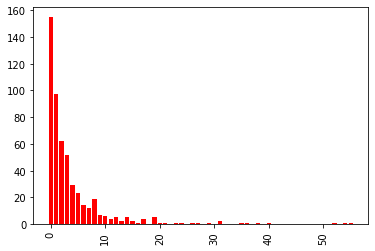

In [42]:
%matplotlib inline
plt.bar(Ren_Count_Data2.Month_Funded_to_Last_Activity, Ren_Count_Data2.Count, color='red')
plt.xticks(rotation=90);

In [43]:
percentage = []
total_count = Ren_Count_Data2.Count.sum()

for i in range(Ren_Count_Data2.shape[0]):
    pct = (Ren_Count_Data2.Count[i] / total_count) * 100
    percentage.append(round(pct, 2))
 
# display percentage
print(percentage)
 
# display data
Ren_Count_Data2['Percentage'] = percentage
display(Ren_Count_Data2)

[29.81, 18.65, 11.92, 10.0, 5.58, 4.42, 2.69, 2.31, 3.65, 1.35, 1.15, 0.77, 0.96, 0.38, 0.96, 0.38, 0.19, 0.77, 0.96, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.38, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19]


,Month_Funded_to_Last_Activity,Count,Percentage
0,0.0,155,29.81
1,1.0,97,18.65
2,2.0,62,11.92
3,3.0,52,10.00
4,4.0,29,5.58
5,5.0,23,4.42
6,6.0,14,2.69
7,7.0,12,2.31
8,8.0,19,3.65
9,9.0,7,1.35


In [1646]:
#Ren_Count_Data2['Percentage'] = Ren_Count_Data2['Count']

#Ren_Count_Data2['Percentage'] = 100*Ren_Count_Data2['Percentage']/(sum(Ren_Count_Data2['Percentage']))
#Ren_Count_Data2 = Ren_Count_Data2.drop('Count%',axis = 1)

#Ren_Count_Data2.head()

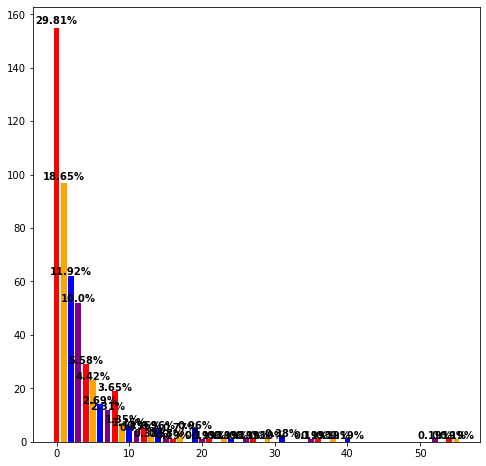

In [44]:
plt.figure(figsize=(8, 8))
colors_list = ['Red', 'Orange', 'Blue', 'Purple']
graph = plt.bar(Ren_Count_Data2.Month_Funded_to_Last_Activity, Ren_Count_Data2.Count, color=colors_list)

#plt.title('Percentage')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(Ren_Count_Data2.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i += 1
plt.show()

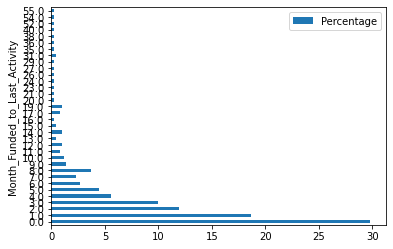

In [45]:
ax = Ren_Count_Data2.plot.barh(x='Month_Funded_to_Last_Activity', y='Percentage')

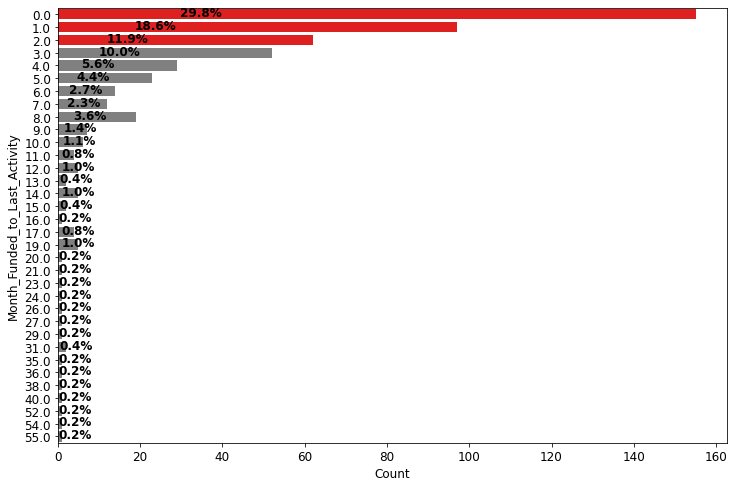

In [46]:
x= Ren_Count_Data2['Count']
y= Ren_Count_Data2['Month_Funded_to_Last_Activity']

plt.figure(figsize=(12,8))
#Ren_Count_Data2 = Ren_Count_Data2.iloc[:,[0,2]]
df = Ren_Count_Data2.groupby('Count').sum().sort_values("Month_Funded_to_Last_Activity", ascending=False)
data = df.reset_index().iloc[:,[0,2]]
data.columns = ['Month_Funded_to_Last_Activity', 'Count']
data = Ren_Count_Data2

clrs = ['red' if (x > 10) else 'gray' for x in Ren_Count_Data2['Percentage']]
ax = sns.barplot(x,y, data=Ren_Count_Data2, orient = 'h', palette=clrs)
ax.set_xlabel('Count',fontsize=12)
ax.set_ylabel('Month_Funded_to_Last_Activity',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(Ren_Count_Data2['Percentage']):
    ax.text(v + 0, i + 0.15, str("{0:.1f}%".format(v)), color='black', fontweight='bold', fontsize=12)

In [1650]:
#RN_filtered2['Month_Funded_to_Last_Activity'].value_counts()[:20].plot(kind='barh')

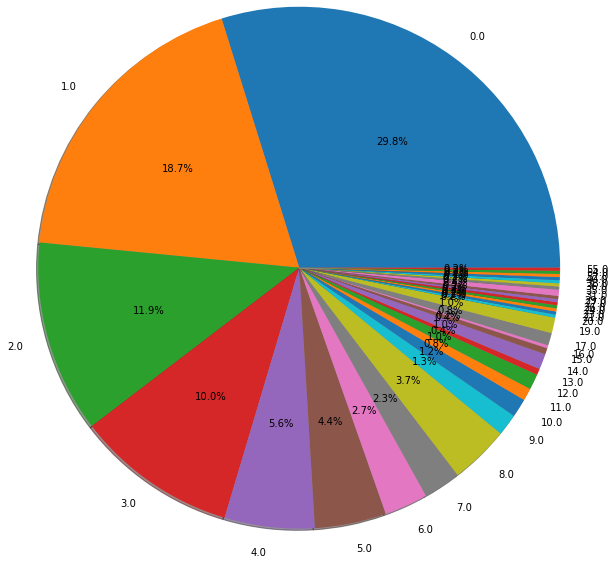

In [47]:
%matplotlib inline
plt.pie(Ren_Count_Data2.Count, labels = Ren_Count_Data2.Month_Funded_to_Last_Activity, 
       shadow=True, autopct='%1.1f%%', radius=3);

In [48]:
Ren_mask = (Renewal_df.Paid_at_Submission >= 1) & (Renewal_df.Submission_App_Type == "New")

RN_filtered9= Renewal_df[Ren_mask]
RN_filtered9

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
16,MC200512102,2020-05-13,MCR000191068,MC190711011,MCR000191068,2020-05-12 07:00:00,Funded MCR Number,2019-07-12,2020-06-16 18:46:00,WROFF,...,DIR,2020-05-01,5.0,New,MC200512102,New,MC190711011,Mismatch,Match,179.0
95,MC200623008,2020-06-23,MCR000144377,MC180822143,MCR000144377,2020-06-22 00:00:00,Funded MCR Number,2018-08-24,2021-04-26 18:33:00,PDOFF,...,DIR,2020-06-01,11.0,New,MC200623008,New,MC180822143,Mismatch,Match,360.0
105,MC200626003,2020-06-29,MCR000156680,MC170801077,MCR000156680,2020-06-24 07:00:00,Funded MCR Number,2017-08-04,2021-03-31 18:30:00,PDOFF,...,WHO,2020-06-01,22.0,New,MC200626003,New,MC170801077,Match,Match,685.0
111,MC200630077,2020-07-01,MCR000141744,MC190604231,MCR000141744,2020-06-30 00:00:00,Funded MCR Number,2019-06-10,NaT,PDOFF,...,DIR,2020-07-01,9.0,New,MC200630077,New,MC190604231,Mismatch,Match,290.0
122,MC200702139,2020-07-08,MCR000141727,MC181210149,MCR000141727,2020-07-02 07:00:00,Funded MCR Number,2018-12-11,2020-07-24 18:36:00,PDOFF,...,DIR,2020-07-01,15.0,New,MC200702139,New,MC181210149,Mismatch,Match,478.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,MC210318069,2021-03-23,MCR000263286,MC160816002,MCR000263286,2021-03-18 00:00:00,Funded MCR Number,2016-09-02,2021-10-26 18:25:00,ACT,...,WHO,2021-03-01,47.0,New,MC210318069,New,MC160816002,Match,Match,1437.0
1320,MC210318088,2021-03-24,MCR000263289,MC181019074,MCR000263289,2021-03-18 00:00:00,Funded MCR Number,2018-10-24,2021-10-26 18:25:00,ACT,...,WHO,2021-03-01,18.0,New,MC210318088,New,MC181019074,Match,Match,568.0
1324,MC210322006,2021-04-01,MCR000263290,MC200213006,MCR000263290,2021-03-22 00:00:00,Funded MCR Number,2020-02-13,NaT,PDOFF,...,WHO,2021-04-01,7.0,New,MC210322006,New,MC200213006,Match,Match,222.0
1340,MC210324094,2021-03-26,MCR000263365,MC150811041,MCR000263365,2021-03-24 00:00:00,Funded MCR Number,2015-08-17,NaT,PDOFF,...,WHO,2021-03-01,61.0,New,MC210324094,New,MC150811041,Match,Match,1855.0


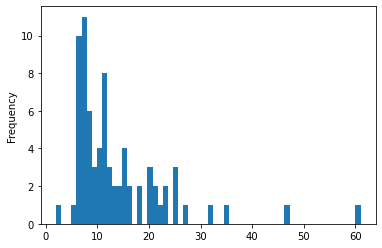

In [49]:
ax = RN_filtered9['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [50]:
Ren_Count_Data8 = RN_filtered9.groupby('Month_Funded_to_Last_Activity').size().reset_index(name='Count')
Ren_Count_Data8

,Month_Funded_to_Last_Activity,Count
0,2.0,1
1,5.0,1
2,6.0,10
3,7.0,11
4,8.0,6
5,9.0,3
6,10.0,4
7,11.0,8
8,12.0,3
9,13.0,2


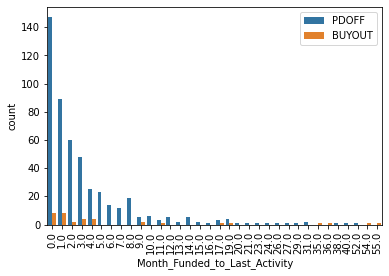

In [51]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Previous_Contract_Account_Status", data = RN_filtered8)
xticks(rotation = 90)
plt.legend(loc='upper right')

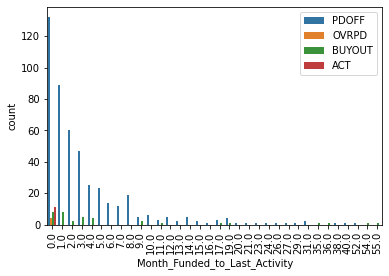

In [52]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Account_Status_at_Submission", data = RN_filtered8)
xticks(rotation = 90)
plt.legend(loc='upper right')

In [1657]:
#plt.figure(figsize=(8,6))
#sns.scatterplot("Requested_Amount","Lead_Score", hue="Is_Submitted", data=Lead_filtered, s=50)
#plt.show()

In [53]:
Ren_mask = (Renewal_df.Paid_at_Submission >= 1) 

RN_filtered10= Renewal_df[Ren_mask]
RN_filtered10

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
14,MC200511049,2020-05-12,MCR000144419,MC190807278,MCR000144419,2020-05-11 07:00:00,Funded MCR Number,2019-08-08,2020-11-09 18:40:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200511049,Renewal,MC190807278,Match,Match,25.0
16,MC200512102,2020-05-13,MCR000191068,MC190711011,MCR000191068,2020-05-12 07:00:00,Funded MCR Number,2019-07-12,2020-06-16 18:46:00,WROFF,...,DIR,2020-05-01,5.0,New,MC200512102,New,MC190711011,Mismatch,Match,179.0
27,MC200522006,2020-05-26,MCR000136592,MC191009353,MCR000136592,2020-05-21 07:00:00,Funded MCR Number,2019-10-28,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200522006,Renewal,MC191009353,Match,Match,20.0
35,MC200526063,2020-05-27,MCR000141768,MC191126307,MCR000141768,2020-05-26 07:00:00,Funded MCR Number,2019-11-27,NaT,PDOFF,...,DIR,2020-05-01,2.0,Renewal,MC200526063,Renewal,MC191126307,Match,Match,80.0
39,MC200528067,2020-05-29,MCR000056742,MC191217003,MCR000056742,2020-05-28 00:00:00,Funded MCR Number,2019-12-18,2021-03-11 09:15:00,PDOFF,...,AP,2020-05-01,0.0,Renewal,MC200528067,Renewal,MC191217003,Match,Match,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,MC211022016,2021-10-22,MCR000292157,MC210112212,MCR000292157,2021-10-07 14:00:00,Funded MCR Number,2021-01-13,2021-10-25 18:34:00,ACT,...,DIR,2021-10-01,4.0,Renewal,MC211022016,Renewal,MC210112212,Match,Match,124.0
2430,MC211025009,2021-10-25,MCR000293249,MC201020116,MCR000293249,2021-10-13 18:07:00,Funded MCR Number,2020-10-20,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,4.0,Renewal,MC211025009,Renewal,MC201020116,Match,Match,144.0
2439,MC211026005,2021-10-26,MCR000294865,MC200707186,MCR000294865,2021-10-21 17:14:00,Funded MCR Number,2020-07-08,NaT,ACT,...,WHO,2021-10-01,6.0,Renewal,MC211026005,Renewal,MC200707186,Match,Match,194.0
2440,MC211026009,2021-10-26,MCR000295423,MC210303071,MCR000295423,2021-10-25 18:12:00,Funded MCR Number,2021-03-05,NaT,ACT,...,DIR,2021-10-01,1.0,Renewal,MC211026009,Renewal,MC210303071,Match,Match,53.0


In [54]:
Paidrate = (sum(RN_filtered10["Paid_at_Submission"])/len(Renewal_df['Paid_at_Submission'].index))*100
Paidrate 

24.350245499181668

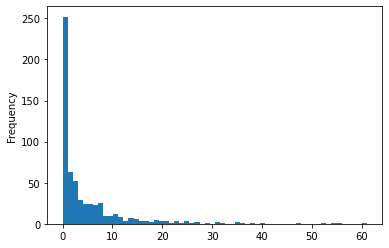

In [55]:
ax = RN_filtered10['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

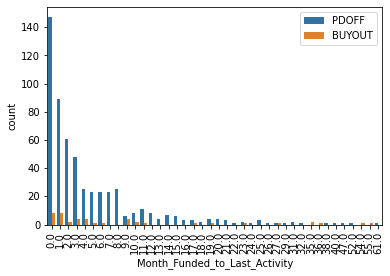

In [56]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Previous_Contract_Account_Status", data = RN_filtered10)
xticks(rotation = 90)
plt.legend(loc='upper right')

In [57]:
Sub_status = Renewal_df[Renewal_df['Submission_Status']=='Funded MCR Number'].count()
Sub_status

Current Contract Number                   2073
Current Contract Funded Date              2073
Current Contract MCR#                     2073
Previous Contract Number                  2073
Submitted MCR#                            2073
Submitted Record Submission Date          2073
Submission_Status                         2073
Previous Funded Date                      2073
Current Contract Last Payment Date        1368
Current_Contract_Account_Status           2073
Previous Contract Last Payment Date        628
Previous_Contract_Account_Status          2073
Previous Contract Last Activity           2070
Previous Contract Lasy Cleared Payment    2065
Account_Status_at_Submission              2073
Paid_at_Submission                        2073
Iso_Group                                 2073
Funded Vintage                            2073
Month_Funded_to_Last_Activity             2070
Submission_App_Type                       2073
FP App Contract Number                    2073
FP_App_Type  

In [58]:
Ren_mask = (Renewal_df.Submission_Status == 'Funded MCR Number')

RN_filtered11= Renewal_df[Ren_mask]
RN_filtered11

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
0,MC200504071,2020-05-05,MCR000154065,MC200108200,MCR000154065,2020-05-04 07:00:00,Funded MCR Number,2020-01-10,2020-06-30 18:43:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504071,Renewal,MC200108200,Match,Match,-1.0
1,MC200504084,2020-05-05,MCR000067962,MC191206220,MCR000067962,2020-05-04 07:00:00,Funded MCR Number,2019-12-19,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504084,Renewal,MC191206220,Match,Match,-1.0
2,MC200504089,2020-05-05,MCR000110253,MC191211289,MCR000110253,2020-05-04 07:00:00,Funded MCR Number,2019-12-18,2020-11-02 18:37:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504089,Renewal,MC191211289,Match,Match,-1.0
3,MC200504104,2020-05-05,MCR000067963,MC191125280,MCR000067963,2020-05-04 07:00:00,Funded MCR Number,2019-11-26,2021-01-05 17:12:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504104,Renewal,MC191125280,Match,Match,-1.0
4,MC200505133,2020-05-20,MCR000077137,MC191015230,MCR000077137,2020-05-05 07:00:00,Funded MCR Number,2019-10-16,2021-02-23 18:04:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200505133,Renewal,MC191015230,Match,Match,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,MC211026003,2021-10-26,MCR000290303,MC210412074,MCR000290303,2021-09-27 19:00:00,Funded MCR Number,2021-04-29,NaT,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211026003,Renewal,MC210412074,Match,Match,-28.0
2439,MC211026005,2021-10-26,MCR000294865,MC200707186,MCR000294865,2021-10-21 17:14:00,Funded MCR Number,2020-07-08,NaT,ACT,...,WHO,2021-10-01,6.0,Renewal,MC211026005,Renewal,MC200707186,Match,Match,194.0
2440,MC211026009,2021-10-26,MCR000295423,MC210303071,MCR000295423,2021-10-25 18:12:00,Funded MCR Number,2021-03-05,NaT,ACT,...,DIR,2021-10-01,1.0,Renewal,MC211026009,Renewal,MC210303071,Match,Match,53.0
2442,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000293822,2021-10-15 19:54:00,Funded MCR Number,2021-06-15,NaT,ACT,...,DIR,2021-10-01,0.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match,-10.0


In [59]:
len(RN_filtered11['Previous Contract Number'].unique().tolist())

2067

In [60]:
Ren_mask = (Renewal_df.Submission_Status == "Lost status") 

RN_filtered= Renewal_df[Ren_mask]
RN_filtered

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
217,MC200803150,2020-08-04,MCR000141616,MC200710029,MCR000141396,2020-07-10 07:00:00,Lost status,2020-07-10,NaT,PDOFF,...,DIR,2020-08-01,-4.0,Renewal,MC200803150,Renewal,MC200710029,Match,Match,-130.0
228,MC200805168,2020-08-06,MCR000141003,MC200316367,MCR000198807,2020-08-04 07:00:00,Lost status,2020-03-17,NaT,PDOFF,...,DIR,2020-08-01,0.0,Renewal,MC200805168,Renewal,MC200316367,Mismatch,Match,-2.0
261,MC200817088,2020-08-18,MCR000085027,MC200630020,MCR000085555,2020-06-30 07:00:00,Lost status,2020-06-30,NaT,PDOFF,...,DIR,2020-08-01,-5.0,Renewal,MC200817088,Renewal,MC200630020,Match,Match,-170.0
268,MC200818151,2020-08-21,MCR000141033,MC200529033,MCR000144433,2020-05-29 07:00:00,Lost status,2020-05-29,2020-12-17 17:35:00,WROFF,...,DIR,2020-08-01,-2.0,Renewal,MC200818151,Renewal,MC200529033,Match,Match,-84.0
280,MC200820012,2020-08-20,MCR000139401,MC200723076,MCR000141410,2020-07-23 07:00:00,Lost status,2020-07-23,NaT,PDOFF,...,DIR,2020-08-01,-7.0,Renewal,MC200820012,Renewal,MC200723076,Match,Match,-225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,MC211022016,2021-10-22,MCR000292157,MC210112212,MCR000266833,2021-05-19 20:26:00,Lost status,2021-01-13,2021-10-25 18:34:00,ACT,...,DIR,2021-10-01,0.0,Renewal,MC211022016,Renewal,MC210112212,Match,Match,-16.0
2428,MC211025002,2021-10-25,MCR000294318,MC210211104,MCR000270087,2021-06-09 17:50:00,Lost status,2021-02-11,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,-4.0,Renewal,MC211025002,Renewal,MC210211104,Match,Match,-136.0
2434,MC211025018,2021-10-25,MCR000290763,MC210520012,MCR000266968,2021-05-20 15:29:00,Lost status,2021-05-20,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,-5.0,Renewal,MC211025018,Renewal,MC210520012,Match,Match,-156.0
2436,MC211026001,2021-10-26,MCR000294241,MC201210036,MCR000270625,2021-06-11 18:15:00,Lost status,2020-12-28,NaT,ACT,...,WHO,2021-10-01,-4.0,Renewal,MC211026001,Renewal,MC201210036,Match,Match,-137.0


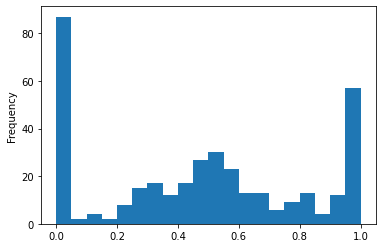

In [61]:
ax = RN_filtered['Paid_at_Submission'].plot.hist(bins=20)

In [1667]:
#Paidrate = (sum(RN_filtered["Paid_at_Submission"])/len(Renewal_df['Paid_at_Submission'].index))*100
#Paidrate 

In [62]:
Ren_Count_Data3 = RN_filtered.groupby('Paid_at_Submission').size().reset_index(name='Count')
Ren_Count_Data3.sample(20)

,Paid_at_Submission,Count
10,0.21,1
56,0.71,2
5,0.14,1
31,0.44,5
46,0.60,3
40,0.53,5
12,0.23,3
39,0.52,10
26,0.39,2
62,0.80,1


In [78]:
percentage = []
total_count = Ren_Count_Data3.Count.sum()

for i in range(Ren_Count_Data3.shape[0]):
    pct = (Ren_Count_Data3.Count[i] / total_count) * 100
    percentage.append(round(pct, 2))
 
# display percentage
print(percentage)
 
# display data
Ren_Count_Data3['Percentage'] = percentage
Ren_Count_Data3.head(20)

[22.91, 0.54, 0.27, 0.27, 0.54, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.81, 0.54, 0.54, 1.35, 0.81, 1.35, 1.08, 0.81, 0.54, 0.54, 1.62, 1.08, 0.81, 0.81, 0.54, 0.81, 1.08, 0.54, 0.81, 1.35, 0.81, 2.16, 1.62, 1.62, 1.08, 1.35, 2.16, 2.7, 1.35, 0.54, 2.16, 1.35, 1.08, 0.81, 0.81, 1.35, 0.81, 1.08, 0.27, 0.27, 1.08, 0.54, 0.81, 0.81, 0.54, 1.08, 0.81, 0.81, 0.54, 0.27, 0.27, 0.54, 0.27, 0.81, 1.35, 0.27, 0.54, 0.54, 1.35, 0.54, 0.81, 0.54, 0.27, 0.27, 0.27, 14.56]


,Paid_at_Submission,Count,Percentage
0,0.00,85,22.91
1,0.03,2,0.54
2,0.06,1,0.27
3,0.09,1,0.27
4,0.10,2,0.54
5,0.14,1,0.27
6,0.15,1,0.27
7,0.18,1,0.27
8,0.19,1,0.27
9,0.20,1,0.27


In [79]:
df1 = Ren_Count_Data3.groupby('Count').sum().sort_values("Paid_at_Submission", ascending=True)
df2 = (df1.reset_index().round(2))
df2

,Count,Paid_at_Submission,Percentage
0,85,0.00,22.91
1,10,0.52,2.70
2,54,1.00,14.56
3,6,1.30,4.86
4,8,1.52,6.48
5,4,4.16,8.64
6,5,4.93,12.15
7,1,8.92,4.86
8,2,9.23,9.18
9,3,9.33,13.77


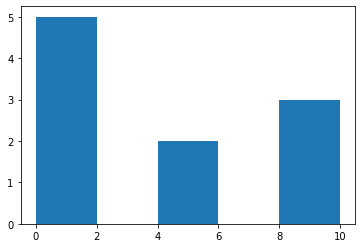

In [80]:
plt.hist(df2['Paid_at_Submission'], bins=5, range=(0, 10))
plt.show()

In [1672]:
#pd.qcut((df1['Paid_at_Submission']),q=5).value_counts()

In [1673]:
#pd.cut(df1['Paid_at_Submission'], bins=4).value_counts().plot(kind = 'bar')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.52'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.3'),
  Text(4, 0, '1.52'),
  Text(5, 0, '4.16'),
  Text(6, 0, '4.93'),
  Text(7, 0, '8.92'),
  Text(8, 0, '9.23'),
  Text(9, 0, '9.33')])

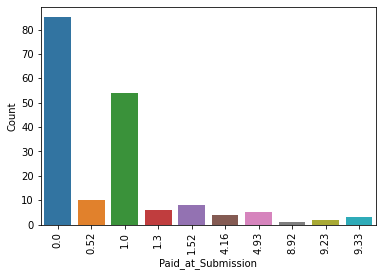

In [81]:
ax = sns.barplot(x="Paid_at_Submission", y="Count",  data=df2)
#ax.set_xticks(np.round(x, 2))
xticks(rotation = 90)

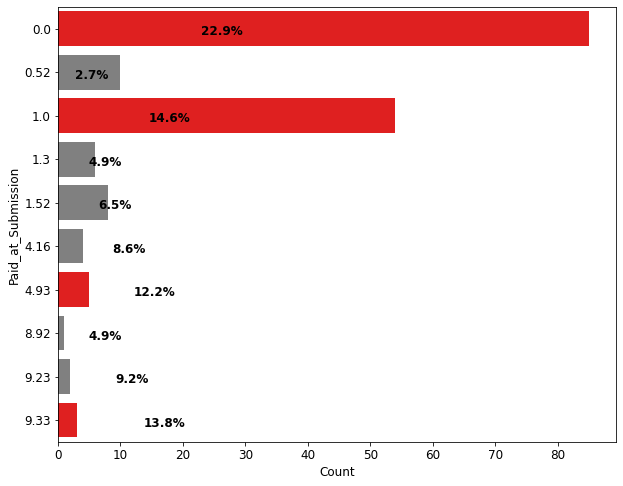

In [67]:
x= df2['Count']
y= df2['Paid_at_Submission']

plt.figure(figsize=(10,8))
#data = df1.iloc[:,[0,2]]
#data.columns = ['Paid_at_Submission', 'Count']

clrs = ['red' if (x > 10) else 'gray' for x in df2['Percentage']]
ax = sns.barplot(x,y, data=df2, orient = 'h', palette=clrs)
ax.set_xlabel('Count',fontsize=12)
ax.set_ylabel('Paid_at_Submission',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(df2['Percentage']):
    ax.text(v + 0, i + 0.15, str("{0:.1f}%".format(v)), color='black', fontweight='bold', fontsize=12)

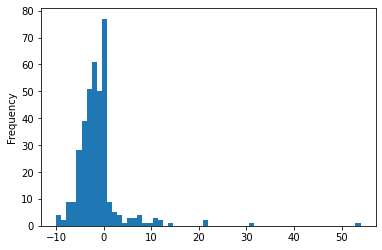

In [68]:
ax = RN_filtered['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

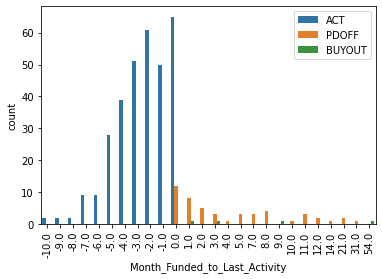

In [69]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Account_Status_at_Submission", data = RN_filtered)
xticks(rotation = 90)
plt.legend(loc='upper right')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'PDOFF'),
  Text(1, 0, 'WROFF'),
  Text(2, 0, 'BUYOUT'),
  Text(3, 0, 'DEF'),
  Text(4, 0, 'SETT'),
  Text(5, 0, 'ACT')])

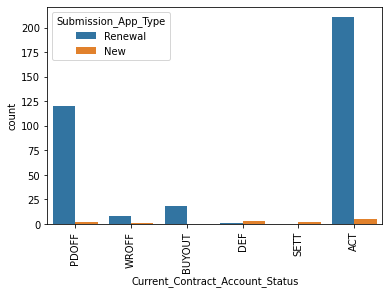

In [70]:
sns.countplot(x = "Current_Contract_Account_Status", hue = "Submission_App_Type", data = RN_filtered)
xticks(rotation = 90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'PDOFF'),
  Text(1, 0, 'BUYOUT'),
  Text(2, 0, 'WROFF'),
  Text(3, 0, 'ACT')])

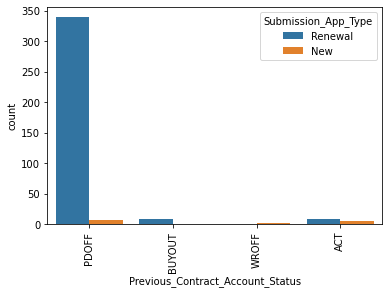

In [71]:
sns.countplot(x = "Previous_Contract_Account_Status", hue = "Submission_App_Type", data = RN_filtered)
xticks(rotation = 90)

(array([0, 1, 2]),
 [Text(0, 0, 'ACT'), Text(1, 0, 'PDOFF'), Text(2, 0, 'BUYOUT')])

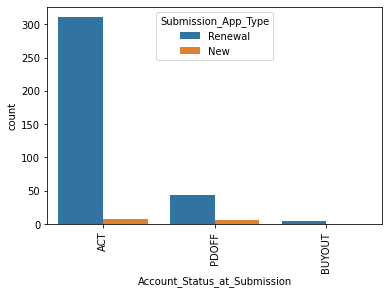

In [72]:
sns.countplot(x = "Account_Status_at_Submission", hue = "Submission_App_Type", data = RN_filtered)
xticks(rotation = 90)

In [1681]:
#%matplotlib inline
#plt.hist(Lead_NAICS.Lead_Capture_Date, bins=50, color='red', edgecolor='black')
#plt.xticks(rotation = 90)

In [73]:
duplicate = RN_filtered[RN_filtered.duplicated('Previous Contract Number')]
duplicate

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
425,MC201001002,2020-10-05,MCR000262883,MC200313246,MCR000242473,2020-09-29 17:47:00,Lost status,2020-03-17,NaT,PDOFF,...,WHO,2020-10-01,0.0,Renewal,MC201001002,Renewal,MC200313246,Match,Match,-4.0
428,MC201002001,2020-10-05,MCR000244122,MC200414126,MCR000242452,2020-09-29 15:51:00,Lost status,2019-12-17,NaT,PDOFF,...,DIR,2020-10-01,0.0,Renewal,MC201002001,Renewal,MC200414126,Match,Match,-4.0
429,MC201002001,2020-10-05,MCR000244122,MC200414126,MCR000242452,2020-09-29 15:51:00,Lost status,2020-04-17,NaT,PDOFF,...,DIR,2020-10-01,0.0,Renewal,MC201002001,Renewal,MC200414126,Match,Match,-4.0
430,MC201002001,2020-10-05,MCR000244122,MC200414126,MCR000242452,2020-09-29 15:51:00,Lost status,2020-04-17,NaT,PDOFF,...,DIR,2020-10-01,0.0,Renewal,MC201002001,Renewal,MC200414126,Match,Match,-4.0
446,MC201006007,2020-10-07,MCR000245579,MC200604085,MCR000243422,2020-10-05 16:12:00,Lost status,2020-06-04,2021-06-10 19:20:00,PDOFF,...,DIR,2020-10-01,0.0,Renewal,MC201006007,Renewal,MC200604085,Mismatch,Match,-2.0
448,MC201006008,2020-10-07,MCR000245592,MC190212104,MCR000242847,2020-10-01 19:14:00,Lost status,2019-02-14,2021-08-12 17:39:00,DEF,...,DIR,2020-10-01,11.0,New,MC201006008,New,MC190212104,Match,Match,364.0
450,MC201006008,2020-10-07,MCR000245592,MC190212104,MCR000243538,2020-10-05 21:34:00,Lost status,2019-02-14,2021-08-12 17:39:00,DEF,...,DIR,2020-10-01,12.0,New,MC201006008,New,MC190212104,Match,Match,368.0
463,MC201008100,2020-10-12,MCR000262874,MC190806089,MCR000243466,2020-10-05 18:18:00,Lost status,2019-08-07,2021-09-28 09:26:00,WROFF,...,WHO,2020-10-01,7.0,Renewal,MC201008100,Renewal,MC190806089,Mismatch,Match,229.0
595,MC201030027,2020-10-30,MCR000262922,MC180625040,MCR000242859,2020-10-01 19:41:00,Lost status,2018-06-27,2021-08-30 10:34:00,SETT,...,WHO,2020-10-01,21.0,New,MC201030027,New,MC180625040,Mismatch,Match,661.0
609,MC201103001,2020-11-03,MCR000259606,MC200214084,MCR000142904,2020-07-10 07:00:00,Lost status,2020-02-18,NaT,PDOFF,...,DIR,2020-11-01,-3.0,Renewal,MC201103001,Renewal,MC200214084,Match,Match,-116.0


In [74]:
print((RN_filtered.duplicated('Previous Contract Number')).sum())

47


In [75]:
duplicate1 = RN_filtered[RN_filtered.duplicated('Current Contract Number')]
duplicate1

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
425,MC201001002,2020-10-05,MCR000262883,MC200313246,MCR000242473,2020-09-29 17:47:00,Lost status,2020-03-17,NaT,PDOFF,...,WHO,2020-10-01,0.0,Renewal,MC201001002,Renewal,MC200313246,Match,Match,-4.0
428,MC201002001,2020-10-05,MCR000244122,MC200414126,MCR000242452,2020-09-29 15:51:00,Lost status,2019-12-17,NaT,PDOFF,...,DIR,2020-10-01,0.0,Renewal,MC201002001,Renewal,MC200414126,Match,Match,-4.0
429,MC201002001,2020-10-05,MCR000244122,MC200414126,MCR000242452,2020-09-29 15:51:00,Lost status,2020-04-17,NaT,PDOFF,...,DIR,2020-10-01,0.0,Renewal,MC201002001,Renewal,MC200414126,Match,Match,-4.0
430,MC201002001,2020-10-05,MCR000244122,MC200414126,MCR000242452,2020-09-29 15:51:00,Lost status,2020-04-17,NaT,PDOFF,...,DIR,2020-10-01,0.0,Renewal,MC201002001,Renewal,MC200414126,Match,Match,-4.0
446,MC201006007,2020-10-07,MCR000245579,MC200604085,MCR000243422,2020-10-05 16:12:00,Lost status,2020-06-04,2021-06-10 19:20:00,PDOFF,...,DIR,2020-10-01,0.0,Renewal,MC201006007,Renewal,MC200604085,Mismatch,Match,-2.0
448,MC201006008,2020-10-07,MCR000245592,MC190212104,MCR000242847,2020-10-01 19:14:00,Lost status,2019-02-14,2021-08-12 17:39:00,DEF,...,DIR,2020-10-01,11.0,New,MC201006008,New,MC190212104,Match,Match,364.0
450,MC201006008,2020-10-07,MCR000245592,MC190212104,MCR000243538,2020-10-05 21:34:00,Lost status,2019-02-14,2021-08-12 17:39:00,DEF,...,DIR,2020-10-01,12.0,New,MC201006008,New,MC190212104,Match,Match,368.0
463,MC201008100,2020-10-12,MCR000262874,MC190806089,MCR000243466,2020-10-05 18:18:00,Lost status,2019-08-07,2021-09-28 09:26:00,WROFF,...,WHO,2020-10-01,7.0,Renewal,MC201008100,Renewal,MC190806089,Mismatch,Match,229.0
595,MC201030027,2020-10-30,MCR000262922,MC180625040,MCR000242859,2020-10-01 19:41:00,Lost status,2018-06-27,2021-08-30 10:34:00,SETT,...,WHO,2020-10-01,21.0,New,MC201030027,New,MC180625040,Mismatch,Match,661.0
609,MC201103001,2020-11-03,MCR000259606,MC200214084,MCR000142904,2020-07-10 07:00:00,Lost status,2020-02-18,NaT,PDOFF,...,DIR,2020-11-01,-3.0,Renewal,MC201103001,Renewal,MC200214084,Match,Match,-116.0


In [76]:
print((RN_filtered.duplicated('Current Contract Number')).sum())

45


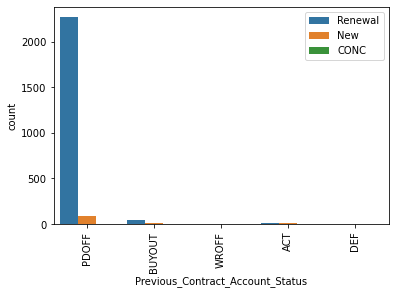

In [77]:
sns.countplot(x = "Previous_Contract_Account_Status", hue = "Submission_App_Type", data = Renewal_df)
xticks(rotation = 90)
plt.legend(loc='upper right')

In [82]:
Ren_mask = (Renewal_df.Previous_Contract_Account_Status == "PDOFF") | (Renewal_df.Previous_Contract_Account_Status == "BUYOUT") 

RN_filtered12= Renewal_df[Ren_mask]
RN_filtered12

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
0,MC200504071,2020-05-05,MCR000154065,MC200108200,MCR000154065,2020-05-04 07:00:00,Funded MCR Number,2020-01-10,2020-06-30 18:43:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504071,Renewal,MC200108200,Match,Match,-1.0
1,MC200504084,2020-05-05,MCR000067962,MC191206220,MCR000067962,2020-05-04 07:00:00,Funded MCR Number,2019-12-19,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504084,Renewal,MC191206220,Match,Match,-1.0
2,MC200504089,2020-05-05,MCR000110253,MC191211289,MCR000110253,2020-05-04 07:00:00,Funded MCR Number,2019-12-18,2020-11-02 18:37:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504089,Renewal,MC191211289,Match,Match,-1.0
3,MC200504104,2020-05-05,MCR000067963,MC191125280,MCR000067963,2020-05-04 07:00:00,Funded MCR Number,2019-11-26,2021-01-05 17:12:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504104,Renewal,MC191125280,Match,Match,-1.0
4,MC200505133,2020-05-20,MCR000077137,MC191015230,MCR000077137,2020-05-05 07:00:00,Funded MCR Number,2019-10-16,2021-02-23 18:04:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200505133,Renewal,MC191015230,Match,Match,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,MC211026005,2021-10-26,MCR000294865,MC200707186,MCR000294865,2021-10-21 17:14:00,Funded MCR Number,2020-07-08,NaT,ACT,...,WHO,2021-10-01,6.0,Renewal,MC211026005,Renewal,MC200707186,Match,Match,194.0
2440,MC211026009,2021-10-26,MCR000295423,MC210303071,MCR000295423,2021-10-25 18:12:00,Funded MCR Number,2021-03-05,NaT,ACT,...,DIR,2021-10-01,1.0,Renewal,MC211026009,Renewal,MC210303071,Match,Match,53.0
2441,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000271150,2021-06-15 14:57:00,Lost status,2021-06-15,NaT,ACT,...,DIR,2021-10-01,-4.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match,-133.0
2442,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000293822,2021-10-15 19:54:00,Funded MCR Number,2021-06-15,NaT,ACT,...,DIR,2021-10-01,0.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match,-10.0


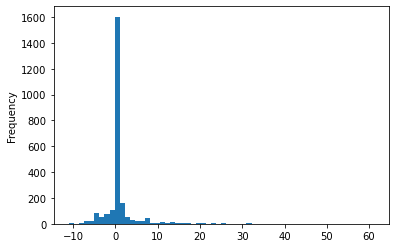

In [84]:
ax = RN_filtered12['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [85]:
Ren_Count_Data5 = RN_filtered12.groupby('Month_Funded_to_Last_Activity').size().reset_index(name='Count')
Ren_Count_Data5

,Month_Funded_to_Last_Activity,Count
0,-11.0,1
1,-10.0,3
2,-9.0,2
3,-8.0,7
4,-7.0,18
5,-6.0,19
6,-5.0,38
7,-4.0,48
8,-3.0,56
9,-2.0,74


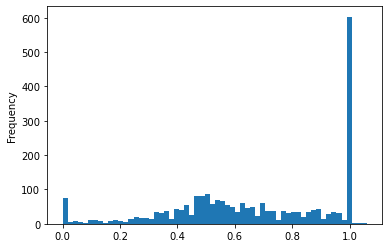

In [109]:
ax = RN_filtered12['Paid_at_Submission'].plot.hist(bins=60)

In [88]:
Ren_mask = (RN_filtered12.Month_Funded_to_Last_Activity >= 6)
RN_filtered13= RN_filtered12[Ren_mask]
RN_filtered13

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
95,MC200623008,2020-06-23,MCR000144377,MC180822143,MCR000144377,2020-06-22 00:00:00,Funded MCR Number,2018-08-24,2021-04-26 18:33:00,PDOFF,...,DIR,2020-06-01,11.0,New,MC200623008,New,MC180822143,Mismatch,Match,360.0
105,MC200626003,2020-06-29,MCR000156680,MC170801077,MCR000156680,2020-06-24 07:00:00,Funded MCR Number,2017-08-04,2021-03-31 18:30:00,PDOFF,...,WHO,2020-06-01,22.0,New,MC200626003,New,MC170801077,Match,Match,685.0
111,MC200630077,2020-07-01,MCR000141744,MC190604231,MCR000141744,2020-06-30 00:00:00,Funded MCR Number,2019-06-10,NaT,PDOFF,...,DIR,2020-07-01,9.0,New,MC200630077,New,MC190604231,Mismatch,Match,290.0
122,MC200702139,2020-07-08,MCR000141727,MC181210149,MCR000141727,2020-07-02 07:00:00,Funded MCR Number,2018-12-11,2020-07-24 18:36:00,PDOFF,...,DIR,2020-07-01,15.0,New,MC200702139,New,MC181210149,Mismatch,Match,478.0
127,MC200707001,2020-07-07,MCR000141721,MC190213030,MCR000141721,2020-07-01 00:00:00,Funded MCR Number,2019-02-14,2021-07-08 18:35:00,PDOFF,...,DIR,2020-07-01,7.0,New,MC200707001,New,MC190213030,Mismatch,Match,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,MC211012009,2021-10-13,MCR000291014,MC191126292,MCR000291014,2021-09-30 19:49:00,Funded MCR Number,2019-11-27,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,14.0,New,MC211012009,New,MC191126292,Match,Match,428.0
2383,MC211014004,2021-10-14,MCR000292464,MC191106233,MCR000292464,2021-10-08 16:22:00,Funded MCR Number,2019-11-08,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,12.0,Renewal,MC211014004,Renewal,MC191106233,Mismatch,Match,392.0
2384,MC211014005,2021-10-14,MCR000292474,MC160907052,MCR000292474,2021-10-08 16:53:00,Funded MCR Number,2016-10-03,2021-10-26 18:25:00,ACT,...,WHO,2021-10-01,52.0,Renewal,MC211014005,Renewal,MC160907052,Mismatch,Match,1583.0
2420,MC211022008,2021-10-22,MCR000294291,MC170828007,MCR000294291,2021-10-19 16:09:00,Funded MCR Number,2017-09-08,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,40.0,Renewal,MC211022008,Renewal,MC170828007,Mismatch,Match,1223.0


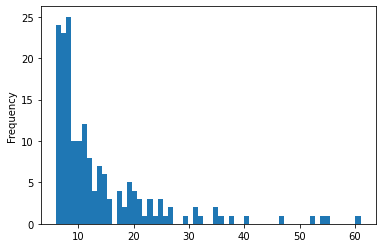

In [89]:
ax = RN_filtered13['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [90]:
Ren_Count_Data6 = RN_filtered13.groupby('Month_Funded_to_Last_Activity').size().reset_index(name='Count')
Ren_Count_Data6

,Month_Funded_to_Last_Activity,Count
0,6.0,24
1,7.0,23
2,8.0,25
3,9.0,10
4,10.0,10
5,11.0,12
6,12.0,8
7,13.0,4
8,14.0,7
9,15.0,6


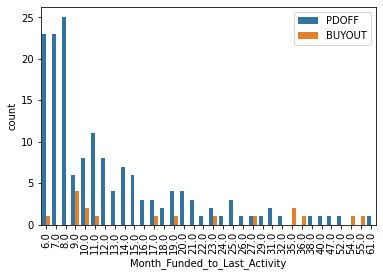

In [91]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Account_Status_at_Submission", data = RN_filtered13)
xticks(rotation = 90)
plt.legend(loc='upper right')

In [92]:
Ren_mask = (RN_filtered12.Month_Funded_to_Last_Activity < 6)
RN_filtered14= RN_filtered12[Ren_mask]
RN_filtered14

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
0,MC200504071,2020-05-05,MCR000154065,MC200108200,MCR000154065,2020-05-04 07:00:00,Funded MCR Number,2020-01-10,2020-06-30 18:43:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504071,Renewal,MC200108200,Match,Match,-1.0
1,MC200504084,2020-05-05,MCR000067962,MC191206220,MCR000067962,2020-05-04 07:00:00,Funded MCR Number,2019-12-19,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504084,Renewal,MC191206220,Match,Match,-1.0
2,MC200504089,2020-05-05,MCR000110253,MC191211289,MCR000110253,2020-05-04 07:00:00,Funded MCR Number,2019-12-18,2020-11-02 18:37:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504089,Renewal,MC191211289,Match,Match,-1.0
3,MC200504104,2020-05-05,MCR000067963,MC191125280,MCR000067963,2020-05-04 07:00:00,Funded MCR Number,2019-11-26,2021-01-05 17:12:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504104,Renewal,MC191125280,Match,Match,-1.0
4,MC200505133,2020-05-20,MCR000077137,MC191015230,MCR000077137,2020-05-05 07:00:00,Funded MCR Number,2019-10-16,2021-02-23 18:04:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200505133,Renewal,MC191015230,Match,Match,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,MC211026003,2021-10-26,MCR000290303,MC210412074,MCR000290303,2021-09-27 19:00:00,Funded MCR Number,2021-04-29,NaT,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211026003,Renewal,MC210412074,Match,Match,-28.0
2440,MC211026009,2021-10-26,MCR000295423,MC210303071,MCR000295423,2021-10-25 18:12:00,Funded MCR Number,2021-03-05,NaT,ACT,...,DIR,2021-10-01,1.0,Renewal,MC211026009,Renewal,MC210303071,Match,Match,53.0
2441,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000271150,2021-06-15 14:57:00,Lost status,2021-06-15,NaT,ACT,...,DIR,2021-10-01,-4.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match,-133.0
2442,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000293822,2021-10-15 19:54:00,Funded MCR Number,2021-06-15,NaT,ACT,...,DIR,2021-10-01,0.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match,-10.0


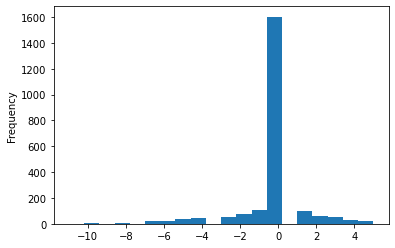

In [93]:
ax = RN_filtered14['Month_Funded_to_Last_Activity'].plot.hist(bins=20)

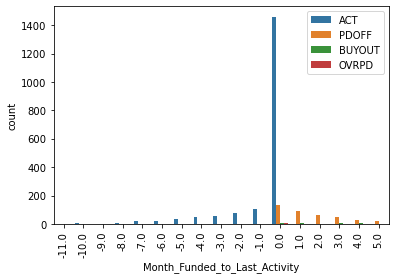

In [94]:
sns.countplot(x = "Month_Funded_to_Last_Activity", hue = "Account_Status_at_Submission", data = RN_filtered14)
xticks(rotation = 90)
plt.legend(loc='upper right')

In [95]:
Ren_Count_Data4 = RN_filtered14.groupby('Month_Funded_to_Last_Activity').size().reset_index(name='Count')
Ren_Count_Data4

,Month_Funded_to_Last_Activity,Count
0,-11.0,1
1,-10.0,3
2,-9.0,2
3,-8.0,7
4,-7.0,18
5,-6.0,19
6,-5.0,38
7,-4.0,48
8,-3.0,56
9,-2.0,74


In [96]:
percentage = []
total_count = Ren_Count_Data4.Count.sum()

for i in range(Ren_Count_Data4.shape[0]):
    pct = (Ren_Count_Data4.Count[i] / total_count) * 100
    percentage.append(round(pct, 2))
 
# display percentage
print(percentage)
 
# display data
Ren_Count_Data4['Percentage'] = percentage
Ren_Count_Data4

[0.04, 0.13, 0.09, 0.31, 0.8, 0.85, 1.7, 2.14, 2.5, 3.3, 4.73, 71.56, 4.33, 2.81, 2.32, 1.29, 1.07]


,Month_Funded_to_Last_Activity,Count,Percentage
0,-11.0,1,0.04
1,-10.0,3,0.13
2,-9.0,2,0.09
3,-8.0,7,0.31
4,-7.0,18,0.80
5,-6.0,19,0.85
6,-5.0,38,1.70
7,-4.0,48,2.14
8,-3.0,56,2.50
9,-2.0,74,3.30


In [1700]:
#df2 = Ren_Count_Data4.groupby('Count').sum().sort_values("Month_Funded_to_Last_Activity", ascending=True)
#df2 = df2.reset_index()
#df2

In [1701]:
#df3 = df2.groupby('Month_Funded_to_Last_Activity').sum().sort_values("Percentage", ascending=False)
#df3 = df3.reset_index()
#df3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '-11.0'),
  Text(1, 0, '-10.0'),
  Text(2, 0, '-9.0'),
  Text(3, 0, '-8.0'),
  Text(4, 0, '-7.0'),
  Text(5, 0, '-6.0'),
  Text(6, 0, '-5.0'),
  Text(7, 0, '-4.0'),
  Text(8, 0, '-3.0'),
  Text(9, 0, '-2.0'),
  Text(10, 0, '-1.0'),
  Text(11, 0, '0.0'),
  Text(12, 0, '1.0'),
  Text(13, 0, '2.0'),
  Text(14, 0, '3.0'),
  Text(15, 0, '4.0'),
  Text(16, 0, '5.0')])

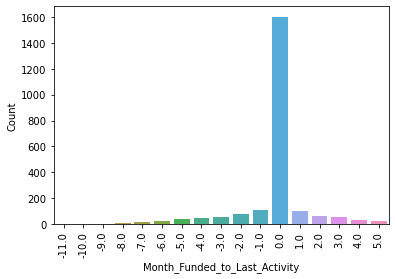

In [97]:
ax = sns.barplot(x="Month_Funded_to_Last_Activity", y="Count",  data=Ren_Count_Data4)
plt.xticks(rotation=90)

In [1703]:
#x= df3['Count']
#y= df3['Month_Funded_to_Last_Activity']

#plt.figure(figsize=(10,8))
#data = df3.iloc[:,[0,2]]
#data.columns = ['Month_Funded_to_Last_Activity', 'Count']
#clrs = ['gray' if (x > 0.2) else 'red' for x in df3['Percentage']]
#ax = sns.barplot(x,y, data=df3, orient = 'h', palette=clrs)
#ax.set_xlabel('Count',fontsize=12)
#ax.set_ylabel('Month_Funded_to_Last_Activity',fontsize=12)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)

#for i, v in enumerate(df3['Percentage']):
    #ax.text(v + 0, i + 0.15, str("{0:.2f}%".format(v)), color='black', fontweight='bold', fontsize=12)

In [98]:
Ren_mask = (Renewal_df.Current_Contract_Account_Status == "PDOFF") | (Renewal_df.Current_Contract_Account_Status == "BUYOUT") 

RN_filtered15= Renewal_df[Ren_mask]
RN_filtered15

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
0,MC200504071,2020-05-05,MCR000154065,MC200108200,MCR000154065,2020-05-04 07:00:00,Funded MCR Number,2020-01-10,2020-06-30 18:43:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504071,Renewal,MC200108200,Match,Match,-1.0
1,MC200504084,2020-05-05,MCR000067962,MC191206220,MCR000067962,2020-05-04 07:00:00,Funded MCR Number,2019-12-19,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504084,Renewal,MC191206220,Match,Match,-1.0
2,MC200504089,2020-05-05,MCR000110253,MC191211289,MCR000110253,2020-05-04 07:00:00,Funded MCR Number,2019-12-18,2020-11-02 18:37:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504089,Renewal,MC191211289,Match,Match,-1.0
3,MC200504104,2020-05-05,MCR000067963,MC191125280,MCR000067963,2020-05-04 07:00:00,Funded MCR Number,2019-11-26,2021-01-05 17:12:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504104,Renewal,MC191125280,Match,Match,-1.0
4,MC200505133,2020-05-20,MCR000077137,MC191015230,MCR000077137,2020-05-05 07:00:00,Funded MCR Number,2019-10-16,2021-02-23 18:04:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200505133,Renewal,MC191015230,Match,Match,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,MC210811016,2021-08-11,MCR000281317,MC201217129,MCR000281317,2021-08-10 17:35:00,Funded MCR Number,2020-12-18,2021-10-21 15:11:00,BUYOUT,...,DIR,2021-08-01,0.0,Renewal,MC210811016,Renewal,MC201217129,Match,Match,-1.0
2030,MC210811016,2021-08-11,MCR000281317,MC201217129,MCR000265446,2021-05-10 20:09:00,Lost status,2020-12-18,2021-10-21 15:11:00,BUYOUT,...,DIR,2021-08-01,-3.0,Renewal,MC210811016,Renewal,MC201217129,Match,Match,-92.0
2031,MC210811016,2021-08-11,MCR000281317,MC201217129,MCR000277806,2021-07-22 14:18:00,Lost status,2020-12-18,2021-10-21 15:11:00,BUYOUT,...,DIR,2021-08-01,0.0,Renewal,MC210811016,Renewal,MC201217129,Match,Match,-20.0
2108,MC210825007,2021-08-25,MCR000283690,MC200408190,MCR000241587,2020-09-22 07:00:00,Lost status,2020-04-09,2021-10-25 10:01:00,BUYOUT,...,DIR,2021-08-01,-4.0,Renewal,MC210825007,Renewal,MC200408190,Match,Match,-141.0


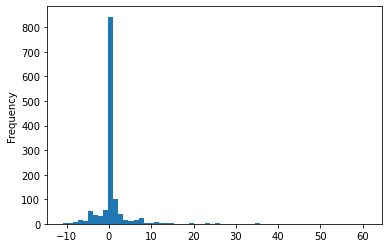

In [99]:
ax = RN_filtered15['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [100]:
Ren_Count_Data6 = RN_filtered15.groupby('Month_Funded_to_Last_Activity').size().reset_index(name='Count')
Ren_Count_Data6

,Month_Funded_to_Last_Activity,Count
0,-11.0,1
1,-10.0,2
2,-9.0,3
3,-8.0,6
4,-7.0,15
5,-6.0,12
6,-5.0,24
7,-4.0,30
8,-3.0,34
9,-2.0,32


In [101]:
percentage = []
total_count = Ren_Count_Data6.Count.sum()

for i in range(Ren_Count_Data6.shape[0]):
    pct = (Ren_Count_Data6.Count[i] / total_count) * 100
    percentage.append(round(pct, 2))
 
# display percentage
print(percentage)
 
# display data
Ren_Count_Data6['Percentage'] = percentage
Ren_Count_Data6

[0.08, 0.15, 0.23, 0.46, 1.15, 0.92, 1.84, 2.3, 2.6, 2.45, 4.28, 64.5, 4.9, 2.75, 3.14, 1.15, 0.84, 1.3, 0.77, 0.92, 0.31, 0.38, 0.46, 0.15, 0.15, 0.08, 0.23, 0.08, 0.08, 0.08, 0.15, 0.23, 0.08, 0.08, 0.15, 0.15, 0.08, 0.08, 0.08, 0.15, 0.08]


,Month_Funded_to_Last_Activity,Count,Percentage
0,-11.0,1,0.08
1,-10.0,2,0.15
2,-9.0,3,0.23
3,-8.0,6,0.46
4,-7.0,15,1.15
5,-6.0,12,0.92
6,-5.0,24,1.84
7,-4.0,30,2.30
8,-3.0,34,2.60
9,-2.0,32,2.45


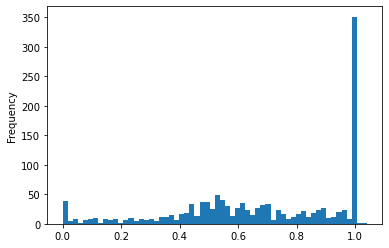

In [102]:
ax = RN_filtered15['Paid_at_Submission'].plot.hist(bins=60)

In [103]:
Ren_mask = (Renewal_df.Account_Status_at_Submission == "PDOFF") | (Renewal_df.Account_Status_at_Submission == "BUYOUT") | (Renewal_df.Account_Status_at_Submission == "OVRPD")

RN_filtered16= Renewal_df[Ren_mask]
RN_filtered16

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
14,MC200511049,2020-05-12,MCR000144419,MC190807278,MCR000144419,2020-05-11 07:00:00,Funded MCR Number,2019-08-08,2020-11-09 18:40:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200511049,Renewal,MC190807278,Match,Match,25.0
16,MC200512102,2020-05-13,MCR000191068,MC190711011,MCR000191068,2020-05-12 07:00:00,Funded MCR Number,2019-07-12,2020-06-16 18:46:00,WROFF,...,DIR,2020-05-01,5.0,New,MC200512102,New,MC190711011,Mismatch,Match,179.0
27,MC200522006,2020-05-26,MCR000136592,MC191009353,MCR000136592,2020-05-21 07:00:00,Funded MCR Number,2019-10-28,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200522006,Renewal,MC191009353,Match,Match,20.0
35,MC200526063,2020-05-27,MCR000141768,MC191126307,MCR000141768,2020-05-26 07:00:00,Funded MCR Number,2019-11-27,NaT,PDOFF,...,DIR,2020-05-01,2.0,Renewal,MC200526063,Renewal,MC191126307,Match,Match,80.0
39,MC200528067,2020-05-29,MCR000056742,MC191217003,MCR000056742,2020-05-28 00:00:00,Funded MCR Number,2019-12-18,2021-03-11 09:15:00,PDOFF,...,AP,2020-05-01,0.0,Renewal,MC200528067,Renewal,MC191217003,Match,Match,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,MC211022016,2021-10-22,MCR000292157,MC210112212,MCR000292157,2021-10-07 14:00:00,Funded MCR Number,2021-01-13,2021-10-25 18:34:00,ACT,...,DIR,2021-10-01,4.0,Renewal,MC211022016,Renewal,MC210112212,Match,Match,124.0
2430,MC211025009,2021-10-25,MCR000293249,MC201020116,MCR000293249,2021-10-13 18:07:00,Funded MCR Number,2020-10-20,2021-10-26 18:25:00,ACT,...,DIR,2021-10-01,4.0,Renewal,MC211025009,Renewal,MC201020116,Match,Match,144.0
2439,MC211026005,2021-10-26,MCR000294865,MC200707186,MCR000294865,2021-10-21 17:14:00,Funded MCR Number,2020-07-08,NaT,ACT,...,WHO,2021-10-01,6.0,Renewal,MC211026005,Renewal,MC200707186,Match,Match,194.0
2440,MC211026009,2021-10-26,MCR000295423,MC210303071,MCR000295423,2021-10-25 18:12:00,Funded MCR Number,2021-03-05,NaT,ACT,...,DIR,2021-10-01,1.0,Renewal,MC211026009,Renewal,MC210303071,Match,Match,53.0


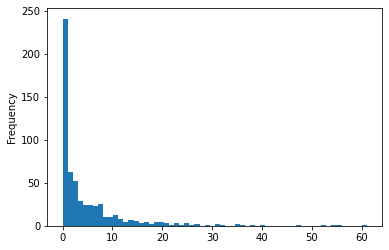

In [104]:
ax = RN_filtered16['Month_Funded_to_Last_Activity'].plot.hist(bins=60)

In [105]:
Ren_Count_Data7 = RN_filtered16.groupby('Month_Funded_to_Last_Activity').size().reset_index(name='Count')
Ren_Count_Data7

,Month_Funded_to_Last_Activity,Count
0,0.0,144
1,1.0,97
2,2.0,63
3,3.0,52
4,4.0,29
5,5.0,24
6,6.0,24
7,7.0,23
8,8.0,25
9,9.0,10


In [106]:
Ren_mask = (Renewal_df.Account_Status_at_Submission == "ACT") 
RN_filtered17= Renewal_df[Ren_mask]
RN_filtered17

,Current Contract Number,Current Contract Funded Date,Current Contract MCR#,Previous Contract Number,Submitted MCR#,Submitted Record Submission Date,Submission_Status,Previous Funded Date,Current Contract Last Payment Date,Current_Contract_Account_Status,...,Iso_Group,Funded Vintage,Month_Funded_to_Last_Activity,Submission_App_Type,FP App Contract Number,FP_App_Type,Previous Contract Number - Activity,Check Match,Re-Check Match,Difference
0,MC200504071,2020-05-05,MCR000154065,MC200108200,MCR000154065,2020-05-04 07:00:00,Funded MCR Number,2020-01-10,2020-06-30 18:43:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504071,Renewal,MC200108200,Match,Match,-1.0
1,MC200504084,2020-05-05,MCR000067962,MC191206220,MCR000067962,2020-05-04 07:00:00,Funded MCR Number,2019-12-19,NaT,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504084,Renewal,MC191206220,Match,Match,-1.0
2,MC200504089,2020-05-05,MCR000110253,MC191211289,MCR000110253,2020-05-04 07:00:00,Funded MCR Number,2019-12-18,2020-11-02 18:37:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504089,Renewal,MC191211289,Match,Match,-1.0
3,MC200504104,2020-05-05,MCR000067963,MC191125280,MCR000067963,2020-05-04 07:00:00,Funded MCR Number,2019-11-26,2021-01-05 17:12:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200504104,Renewal,MC191125280,Match,Match,-1.0
4,MC200505133,2020-05-20,MCR000077137,MC191015230,MCR000077137,2020-05-05 07:00:00,Funded MCR Number,2019-10-16,2021-02-23 18:04:00,PDOFF,...,DIR,2020-05-01,0.0,Renewal,MC200505133,Renewal,MC191015230,Match,Match,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,MC211026001,2021-10-26,MCR000294241,MC201210036,MCR000270625,2021-06-11 18:15:00,Lost status,2020-12-28,NaT,ACT,...,WHO,2021-10-01,-4.0,Renewal,MC211026001,Renewal,MC201210036,Match,Match,-137.0
2437,MC211026001,2021-10-26,MCR000294241,MC201210036,MCR000294241,2021-10-19 14:57:00,Funded MCR Number,2020-12-28,NaT,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211026001,Renewal,MC201210036,Match,Match,-7.0
2438,MC211026003,2021-10-26,MCR000290303,MC210412074,MCR000290303,2021-09-27 19:00:00,Funded MCR Number,2021-04-29,NaT,ACT,...,WHO,2021-10-01,0.0,Renewal,MC211026003,Renewal,MC210412074,Match,Match,-28.0
2441,MC211026010,2021-10-26,MCR000293822,MC210615037,MCR000271150,2021-06-15 14:57:00,Lost status,2021-06-15,NaT,ACT,...,DIR,2021-10-01,-4.0,Renewal,MC211026010,Renewal,MC210615037,Match,Match,-133.0


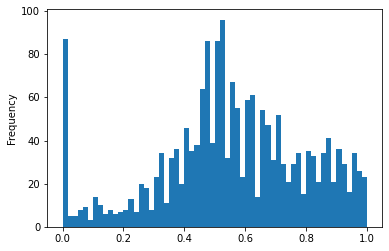

In [107]:
ax = RN_filtered17['Paid_at_Submission'].plot.hist(bins=60)

In [108]:
Ren_Count_Data8 = RN_filtered17.groupby('Paid_at_Submission').size().reset_index(name='Count')
Ren_Count_Data8.tail(45)

,Paid_at_Submission,Count
56,0.56,36
57,0.57,27
58,0.58,28
59,0.59,23
60,0.60,26
61,0.61,33
62,0.62,33
63,0.63,28
64,0.64,14
65,0.65,31


In [449]:
#print(Lead_filtered['LTTest_Naics'].unique())